In [ ]:
# %%

# IMPORTS
import os, pickle

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"
os.environ["KMP_AFFINITY"] = "noverbose"
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
from tensorflow import keras as k
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

E0000 00:00:1731593330.645359   93014 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1731593330.647825   93014 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
#%% 

# READ  & SCALE
import numpy as np
images = np.load("data/images.npy")
labels = np.load("data/labels.npy")
images = images.astype(float)/255

In [ ]:
#%% 

# PREPARE LABELS
num_classes=720//5 # trying every half hour
labels_144 = (60//5)*labels[:,0] + labels[:,1]//5
assert num_classes == len(set(labels_144))
labels_144= labels_144.astype(float)
encoded_labels = k.utils.to_categorical(labels_144, num_classes)

counts = pd.DataFrame(labels_144).value_counts()
print(f"counts are: {counts.mean()} per class")

counts are: 125.0 per class


In [ ]:
# %% 

# SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    images, encoded_labels, test_size=0.1, random_state=42
)
X, X_val, y, y_val= train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)
img_rows, img_cols = images.shape[1:]
input_shape=(img_rows,img_cols,1)

In [ ]:
#%% 

# MODEL
from thanos_models import create_model
model = create_model(input_shape=input_shape,num_classes=num_classes)
model.summary()

/vol/home/s4398831/workspace/leiden/S1/IDL/2024/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1731593342.483903   93014 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6223 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 74, 74, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 72, 72, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 36, 36, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 34, 34, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 17, 17, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 15, 15, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 7, 7, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 144)            │        18,576 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,014,096 (7.68 MB)

 Trainable params: 2,013,136 (7.68 MB)

 Non-trainable params: 960 (3.75 KB)

In [ ]:
#%% 

# CALLBACKS
checkpoint_cb = k.callbacks.ModelCheckpoint(
    f"cla{num_classes}.keras", 
    save_best_only=True,
    monitor="val_loss",
    )
early_stopping_cb = k.callbacks.EarlyStopping(  
    patience=42,
    restore_best_weights=True,
    monitor="val_loss",
    )
cb =  [checkpoint_cb,early_stopping_cb]

In [ ]:
#%%

# TRAIN
batch_size=64
epochs=500
history = model.fit(X, y,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_val, y_val),
          callbacks=cb)

Epoch 1/500


I0000 00:00:1731593344.593950   93236 service.cc:148] XLA service 0x7d8740003240 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1731593344.593978   93236 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060, Compute Capability 8.9
I0000 00:00:1731593344.696713   93236 cuda_dnn.cc:529] Loaded cuDNN version 90300


  5/228 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.0096 - loss: 5.3558

I0000 00:00:1731593349.911187   93236 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


228/228 ━━━━━━━━━━━━━━━━━━━━ 21s 67ms/step - accuracy: 0.0070 - loss: 5.0432 - val_accuracy: 0.0074 - val_loss: 5.0541
Epoch 2/500
228/228 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.0081 - loss: 4.9623 - val_accuracy: 0.0080 - val_loss: 5.0049
Epoch 3/500
228/228 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.0109 - loss: 4.9404 - val_accuracy: 0.0086 - val_loss: 4.9719
Epoch 4/500
228/228 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.0160 - loss: 4.9028 - val_accuracy: 0.0086 - val_loss: 4.9573
Epoch 5/500
228/228 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.0214 - loss: 4.8421 - val_accuracy: 0.0191 - val_loss: 4.9075
Epoch 6/500
228/228 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.0302 - loss: 4.7307 - val_accuracy: 0.0284 - val_loss: 4.7793
Epoch 7/500
228/228 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.0529 - loss: 4.5377 - val_accuracy: 0.0247 - val_loss: 4.7538
Epoch 8/500
228/228 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.0755 - loss: 4.3051 - val_accurac

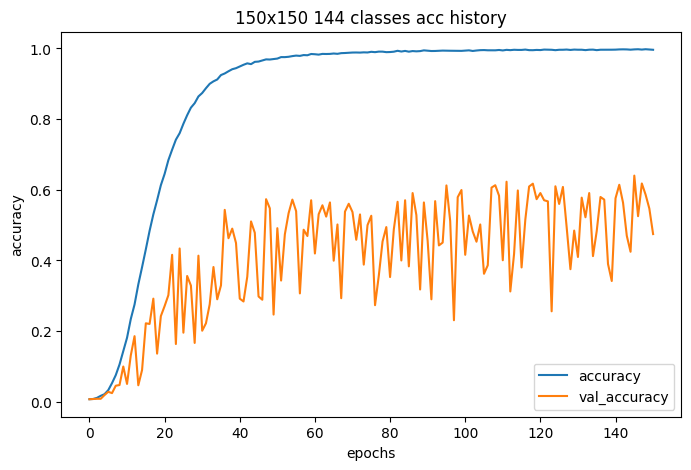

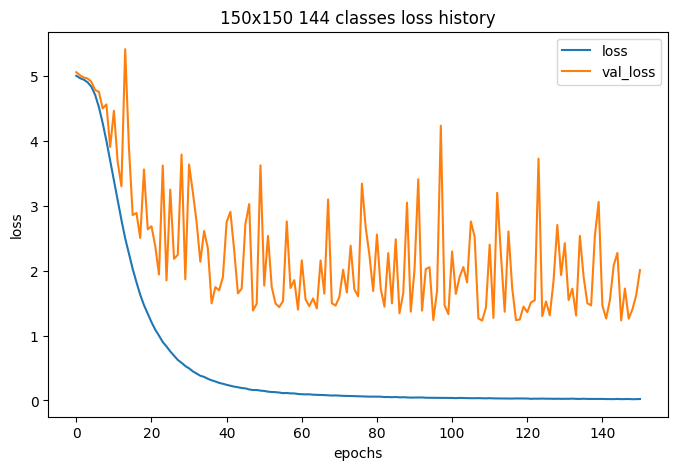

In [ ]:
# %% 

# Plot results
import pandas as pd
import matplotlib.pyplot as plt
hist = pd.DataFrame(history.history)
acc_col = ["accuracy","val_accuracy"]
loss_col = ["loss","val_loss"]
title = f'{X.shape[1]}x{X.shape[2]} {num_classes} classes'
hist[acc_col].plot(figsize=(8, 5),xlabel='epochs',ylabel='accuracy',title=title+' acc history')
plt.savefig(f'cla{num_classes}_acc.png')

hist[loss_col].plot(figsize=(8,5),xlabel='epochs',ylabel='loss',title=title+' loss history')
plt.savefig(f'cla{num_classes}_loss.png')

hist.to_csv(f'cla{num_classes}.csv',index=False)

In [ ]:
# %%

# calculate accuracy -->? 
y_pred  = model.predict(X_test)
y_pred_class = np.argmax(y_pred,axis=1)
y_true_class= np.argmax(y_test,axis=1)
"test accuracy",sum(y_pred_class==y_true_class)/len(y_true_class)

57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


('test accuracy', 0.61)